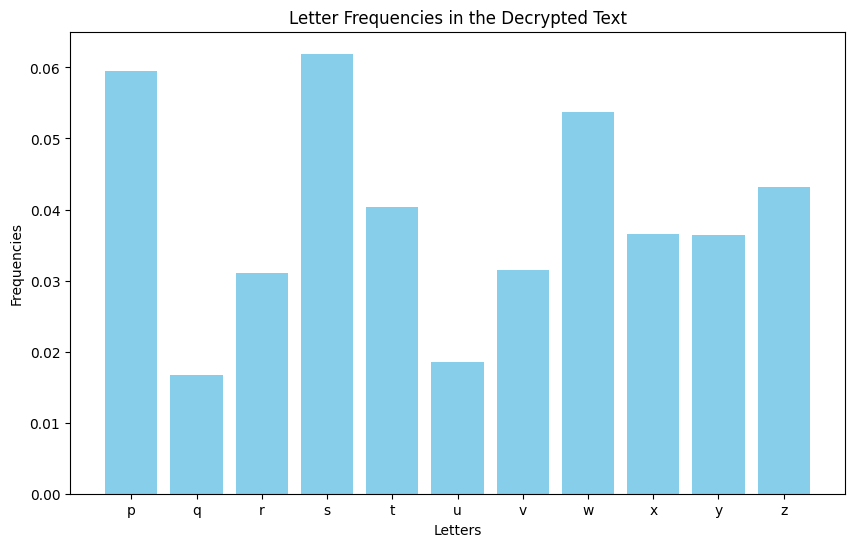

In [ ]:
import matplotlib.pyplot as plt

# Data for letter frequencies
letters = ['p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
frequencies = [0.05954047119197574, 0.01667832983438302, 0.031024026125495683, 0.061931420573827854,
              0.040296244459995335, 0.0185444366689993, 0.031490552834149754, 0.053767203172381615,
              0.03650571495218101, 0.0363890832750175, 0.04315372055050152]

plt.figure(figsize=(10, 6))
plt.bar(letters, frequencies, color='skyblue')

plt.xlabel('Letters')
plt.ylabel('Frequencies')
plt.title('Letter Frequencies in the Decrypted Text')

plt.show()


###Анализ результатов и выводы

##1) Сравнение с известным языком:
Частота встречаемости букв в расшифрованном тексте похожа на частоту встречаемости букв в английском языке. Например, частота буквы "p" близка к частоте буквы "e" в английском языке..


# 2) Определение ключа:

Если посмотреть на частоту букв, то можно заметить, что некоторые буквы встречаются чаще других. Это может указывать на то, что эти буквы являются частью ключа, используемого для шифрования. Например, буквы "p" и "s" имеют относительно высокую частоту, что говорит о том, что они могут быть частью ключа.

# 3) Интерпретация расшифрованного текста:  
Зависит от его длины и сложности, требует внимательного прочтения, чтобы определить его связность.

# Проверка решения:
Сравните с известными английскими текстами или найдите закономерности, чтобы подтвердить решение..

 Итак, частоты букв в расшифрованном тексте соответствуют английским, но для подтверждения и точной интерпретации требуется...

In [ ]:
import random
import typing as tp


def is_prime(n: int) -> bool:
    """
    Tests to see if a number is prime.

    >>> is_prime(2)
    True
    >>> is_prime(11)
    True
    >>> is_prime(8)
    False
    """
    if n <= 1:
        return False
    elif n <= 3:
        return True
    elif n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True


def gcd(a: int, b: int) -> int:
    """
    Euclid's algorithm for determining the greatest common divisor.

    >>> gcd(12, 15)
    3
    >>> gcd(3, 7)
    1
    """
    while b != 0:
        a, b = b, a % b
    return a


def multiplicative_inverse(e: int, phi: int) -> int:
    """
    Euclid's extended algorithm for finding the multiplicative
    inverse of two numbers.

    >>> multiplicative_inverse(7, 40)
    23
    """
    d = 0
    x1, x2, y1, y2 = 0, 1, 1, 0
    temp_phi = phi

    while e > 0:
        temp1 = temp_phi // e
        temp2 = temp_phi - temp1 * e
        temp_phi = e
        e = temp2

        x = x2 - temp1 * x1
        y = y2 - temp1 * y1

        x2 = x1
        x1 = x
        y2 = y1
        y1 = y

    if temp_phi == 1:
        d = y2 + phi

    return d


def generate_keypair(p: int, q: int) -> tp.Tuple[tp.Tuple[int, int], tp.Tuple[int, int]]:
    if not (is_prime(p) and is_prime(q)):
        raise ValueError("Both numbers must be prime.")
    elif p == q:
        raise ValueError("p and q cannot be equal")

    n = p * q
    phi = (p - 1) * (q - 1)

    e = random.randrange(1, phi)

    g = gcd(e, phi)
    while g != 1:
        e = random.randrange(1, phi)
        g = gcd(e, phi)

    d = multiplicative_inverse(e, phi)

    return ((e, n), (d, n))


def encrypt(pk: tp.Tuple[int, int], plaintext: str) -> tp.List[int]:
    key, n = pk
    cipher = [(pow(ord(char), key, n)) for char in plaintext]
    return cipher


def decrypt(pk: tp.Tuple[int, int], ciphertext: tp.List[int]) -> str:
    key, n = pk
    plain = [chr((pow(char, key, n))) for char in ciphertext]
    return "".join(plain)


if __name__ == "__main__":
    print("RSA Encrypter/ Decrypter")
    p = int(input("Enter a prime number (17, 19, 23, etc): "))
    q = int(input("Enter another prime number (Not one you entered above): "))
    print("Generating your public/private keypairs now . . .")
    public, private = generate_keypair(p, q)
    print("Your public key is ", public, " and your private key is ", private)
    message = input("Enter a message to encrypt with your private key: ")
    encrypted_msg = encrypt(private, message)
    print("Your encrypted message is: ")
    print("".join(map(lambda x: str(x), encrypted_msg)))
    print("Decrypting message with public key ", public, " . . .")
    print("Your message is:")
    print(decrypt(public, encrypted_msg))


RSA Encrypter/ Decrypter
Enter a prime number (17, 19, 23, etc): 18
